# Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings("ignore", category = DataConversionWarning)
warnings.filterwarnings("ignore", message="Unable to import Axes3D.*")

# Read Dataset

In [3]:
dataset = pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_dataset = pd.read_csv('titanic_test.csv')
test_dataset.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Missing Values of Train Data & Test Data

In [5]:
train_data = dataset[['Age', 'Fare']]
train_data.isnull().sum()

Age     177
Fare      0
dtype: int64

In [6]:
test_data = test_dataset[['Age', 'Fare']]
test_data.isnull().sum()

Age     86
Fare     1
dtype: int64

# Missing Values Position
## Train Data

In [7]:
Age_pos_missing_train = np.where(pd.isnull(train_data['Age'])) 
print("Missing Values Position of Age Attribute in Train Data:\n\n", Age_pos_missing_train)

Missing Values Position of Age Attribute in Train Data:

 (array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
        48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
       126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
       196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
       270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
       334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
       409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
       459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
       511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
       564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
       613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
       692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
       773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
     

## Test Data

In [8]:
Age_pos_missing_test = np.where(pd.isnull(test_data['Age'])) 
print("Missing Values Position of Age Attribute in Test Data:\n\n", Age_pos_missing_test)

Fare_pos_missing_test = np.where(pd.isnull(test_data['Fare'])) 
print("\nMissing Values Position of Fare Attribute in Test Data:\n\n", Fare_pos_missing_test)

Missing Values Position of Age Attribute in Test Data:

 (array([ 10,  22,  29,  33,  36,  39,  41,  47,  54,  58,  65,  76,  83,
        84,  85,  88,  91,  93, 102, 107, 108, 111, 116, 121, 124, 127,
       132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191,
       199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255,
       256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290,
       292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366,
       380, 382, 384, 408, 410, 413, 416, 417], dtype=int64),)

Missing Values Position of Fare Attribute in Test Data:

 (array([152], dtype=int64),)


# Handling Missing Values

In [9]:
train_data = train_data.dropna()
train_data.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [10]:
test_data = test_data.dropna()
test_data.head()

,Age,Fare
0,34.5,7.8292
1,47.0,7.0000
2,62.0,9.6875
3,27.0,8.6625
4,22.0,12.2875


# Train Label & Test Label

In [11]:
train_label = []

for index in Age_pos_missing_train[0]:
    if index in dataset.index:
        dataset.drop(index, inplace = True)

for index, row in dataset.iterrows():
    train_label.append(row['Survived'])

train_label = pd.DataFrame(train_label, columns = ['Survived'])
train_label.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [12]:
titanic_testlabel = pd.read_csv('titanic_testlabel.csv')
test_label = []

for index in Age_pos_missing_test[0]:
    if index in titanic_testlabel.index:
        titanic_testlabel.drop(index, inplace = True)
        
for index in Fare_pos_missing_test[0]:
    if index in titanic_testlabel.index:
        titanic_testlabel.drop(index, inplace = True)

for index, row in titanic_testlabel.iterrows():
    test_label.append(row['Survived'])

test_label = pd.DataFrame(test_label, columns = ['Survived'] )
test_label.head()

,Survived
0,0
1,1
2,0
3,0
4,1


# Normalization
## Train Data

In [13]:
train_mindata = train_data.min()
train_maxdata = train_data.max()
train_newmin = 0
train_newmax = 1

train_data = ((train_data - train_mindata) * (train_newmax - train_newmin) / (train_maxdata - train_mindata)) + train_newmin
train_data.head()

,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


## Test Data

In [14]:
test_mindata = train_mindata
test_maxdata = train_maxdata
test_newmin = train_newmin
test_newmax = train_newmax

test_data = ((test_data - test_mindata) * (test_newmax - test_newmin) / (test_maxdata - test_mindata)) + test_newmin
test_data.head()

,Age,Fare
0,0.428248,0.015282
1,0.585323,0.013663
2,0.773813,0.018909
3,0.334004,0.016908
4,0.271174,0.023984


# Classification

In [15]:
class_results = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_data, train_label)
    class_result = knn.predict(test_data)
    class_results.append(class_result)  
    print(f'== KNN with k: {k}\nResult:\n{class_result}\n')

== KNN with k: 1
Result:
[0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0
 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0
 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0
 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1
 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0]

== KNN with k: 2
Result:
[0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0

In [16]:
for k, class_result in enumerate(class_results, start = 1):
    accuracy = accuracy_score(test_label, class_result)
    error_ratio = 1 - accuracy
    print(f'Error ratio for k = {k}: {error_ratio:.5f}')

Error ratio for k = 1: 0.45015
Error ratio for k = 2: 0.38066
Error ratio for k = 3: 0.43807
Error ratio for k = 4: 0.41692
Error ratio for k = 5: 0.41390
Error ratio for k = 6: 0.40181
Error ratio for k = 7: 0.42296
Error ratio for k = 8: 0.39577
Error ratio for k = 9: 0.42296
Error ratio for k = 10: 0.38369


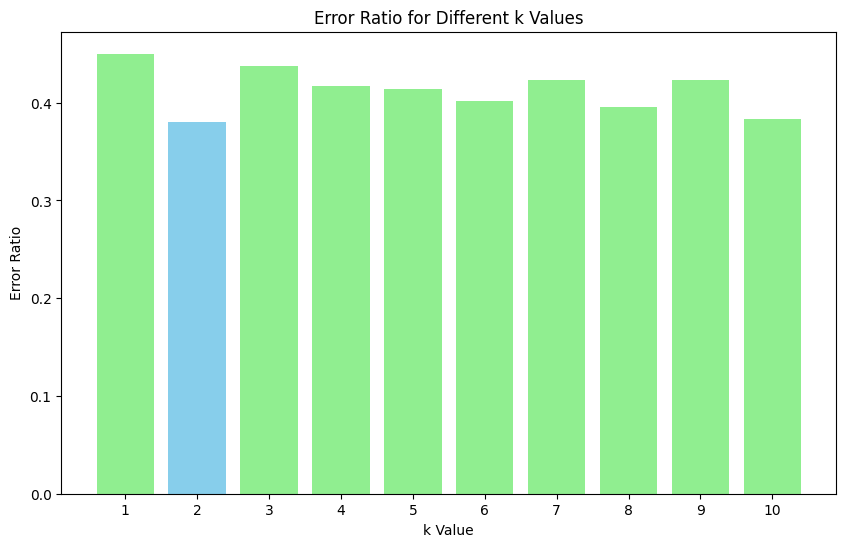

In [17]:
import matplotlib.pyplot as plt

error_ratios = []
for k, class_result in enumerate(class_results, start = 1):
    accuracy = accuracy_score(test_label, class_result)
    error_ratio = 1 - accuracy
    error_ratios.append(error_ratio)

min_error_ratio = min(error_ratios)
min_index = error_ratios.index(min_error_ratio)

plt.figure(figsize = (10, 6))

colors = ['lightgreen' if i != min_index else 'skyblue' for i in range(10)]

plt.bar(range(1, 11), error_ratios, color = colors)
plt.xlabel('k Value')
plt.ylabel('Error Ratio')
plt.title('Error Ratio for Different k Values')
plt.xticks(range(1, 11))
plt.show()